In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, roc_curve, roc_auc_score


In [18]:
#Reading from CSV File and Storing in Dataframe
X_train = pd.read_csv('../../Dataset/x_train_all.csv')
y_train = pd.read_csv('../../Dataset/y_train_all.csv')
X_test = pd.read_csv('../../Dataset/x_test_all.csv')
y_test = pd.read_csv('../../Dataset/y_test_all.csv')


In [19]:
#Converting them to numpy arrays
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

In [20]:
#Printing the shapes of the training
print("========================================")
print("Shape of X_train is  :", X_train.shape)
print("Shape of y_train is  :", y_train.shape)
print("Shape of X_test is   :", X_test.shape)
print("Shape of y_test is   :", y_test.shape)
print("========================================")

Shape of X_train is  : (9690, 2304)
Shape of y_train is  : (9690, 1)
Shape of X_test is   : (3090, 2304)
Shape of y_test is   : (3090, 1)


In [21]:
#Reshaping the training and test dataset
X_train_reshape = X_train.reshape(len(X_train),48,48)
X_test_reshape = X_test.reshape(len(X_test),48,48)

In [22]:
#Prining New shapes of the training and test dataset
print("========================================")
print("Shape of X_train is  :", X_train_reshape.shape)
print("Shape of X_test is   :", X_test_reshape.shape)
print("========================================")

Shape of X_train is  : (9690, 48, 48)
Shape of X_test is   : (3090, 48, 48)


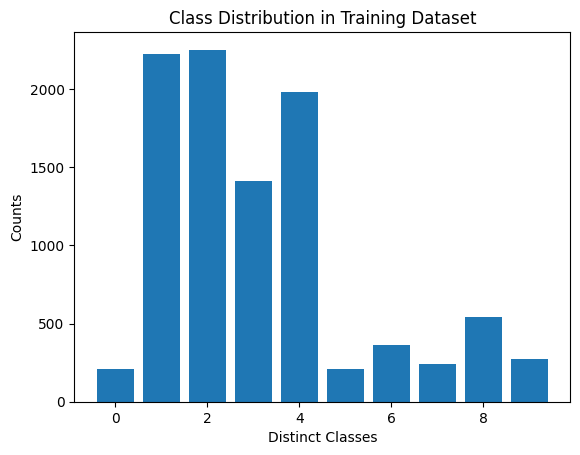

In [23]:
#Calulating the counts of records for each class in the training dataset

#Getting unique values and the counts
unique_values_train, counts_train = np.unique(y_train, return_counts=True)
#Plotting the graph
plt.bar(unique_values_train, counts_train)
plt.xlabel('Distinct Classes')
plt.ylabel('Counts')
plt.title('Class Distribution in Training Dataset')
plt.show()

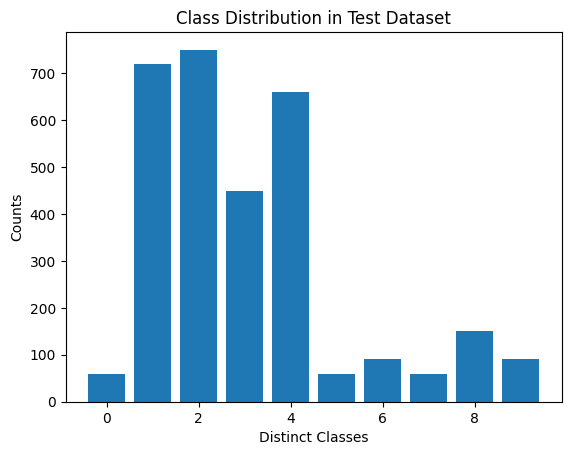

In [24]:
#Calulating the counts of records for each class in the test dataset

#Getting unique values and the counts
unique_values_test, counts_test = np.unique(y_test, return_counts=True)
total_count = len(y_test)
#Plotting the graph
plt.bar(unique_values_test, counts_test)
plt.xlabel('Distinct Classes')
plt.ylabel('Counts')
plt.title('Class Distribution in Test Dataset')
plt.show()

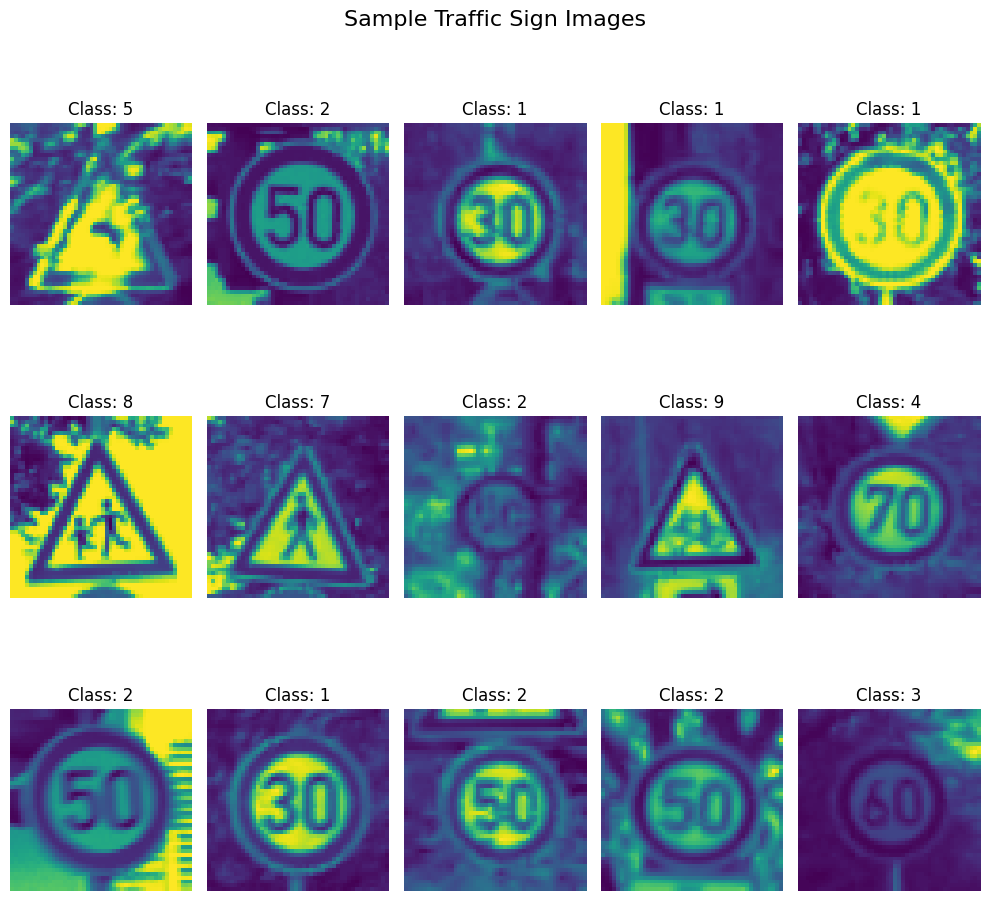

In [25]:
num_samples = 15
sample_indices = np.random.randint(0, len(X_train_reshape), num_samples)

fig, axes = plt.subplots(3, 5, figsize=(10, 10))

for i, ax in enumerate(axes.flatten()):
    if i < num_samples:
        image = X_train_reshape[sample_indices[i]]
        img_class = y_train[sample_indices[i]]
        ax.imshow(image)
        ax.axis('off')
        ax.set_title(f"Class: {img_class[0]}", fontsize=12)

plt.suptitle('Sample Traffic Sign Images', fontsize=16)
plt.tight_layout()
plt.show()

In [48]:
X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(X_train, y_train, test_size=0.2, stratify=y_train, random_state=42)

In [49]:
X_train_new.shape

(7752, 2304)

In [50]:
nb_classifier = MultinomialNB()
cv_scores = cross_val_score(nb_classifier, X_train_new, y_train_new, cv=5)

/opt/homebrew/lib/python3.11/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/homebrew/lib/python3.11/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/homebrew/lib/python3.11/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/homebrew/lib/python3.11/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,

In [51]:
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train_new, y_train_new)

/opt/homebrew/lib/python3.11/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MultinomialNB()

In [52]:
y_pred = nb_classifier.predict(X_test_new)
accuracy = accuracy_score(y_test_new, y_pred)

# roc_auc = roc_auc_score(y_test_new, y_pred)

print("========================================")
print("Accuracy Score is :", accuracy)
print("========================================")



Accuracy Score is : 0.35810113519091846
